In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
library(forecast)

In [ ]:
data(AirPassengers)

In [ ]:
class(AirPassengers)

[1] "ts"

In [ ]:
start(AirPassengers)

[1] 1949    1

In [ ]:
end(AirPassengers)

[1] 1960   12

In [ ]:
summary(AirPassengers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

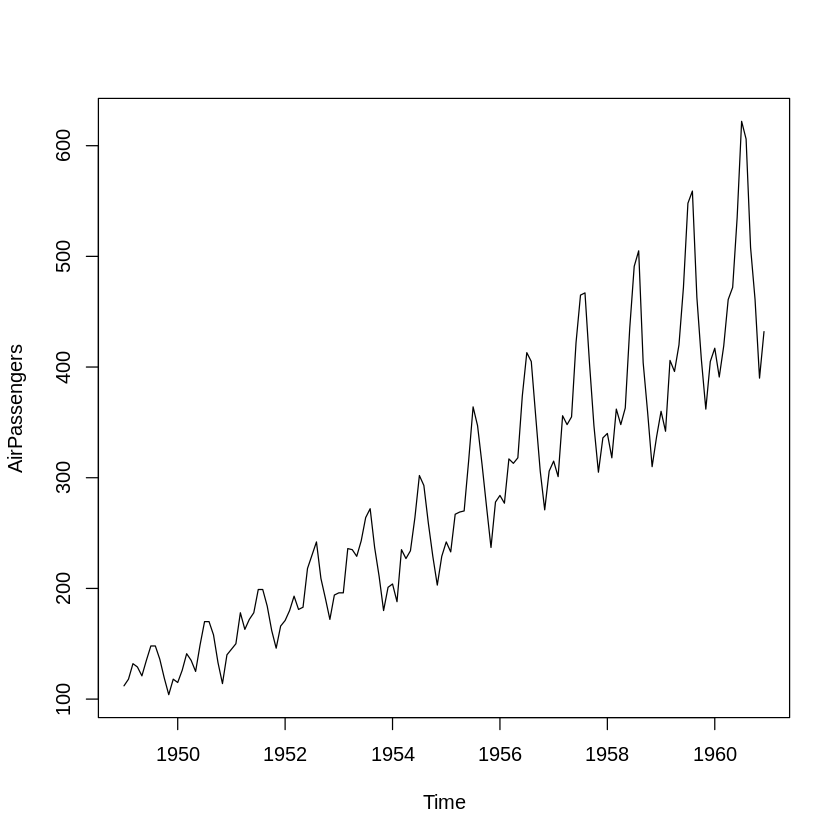

In [ ]:
plot(AirPassengers)

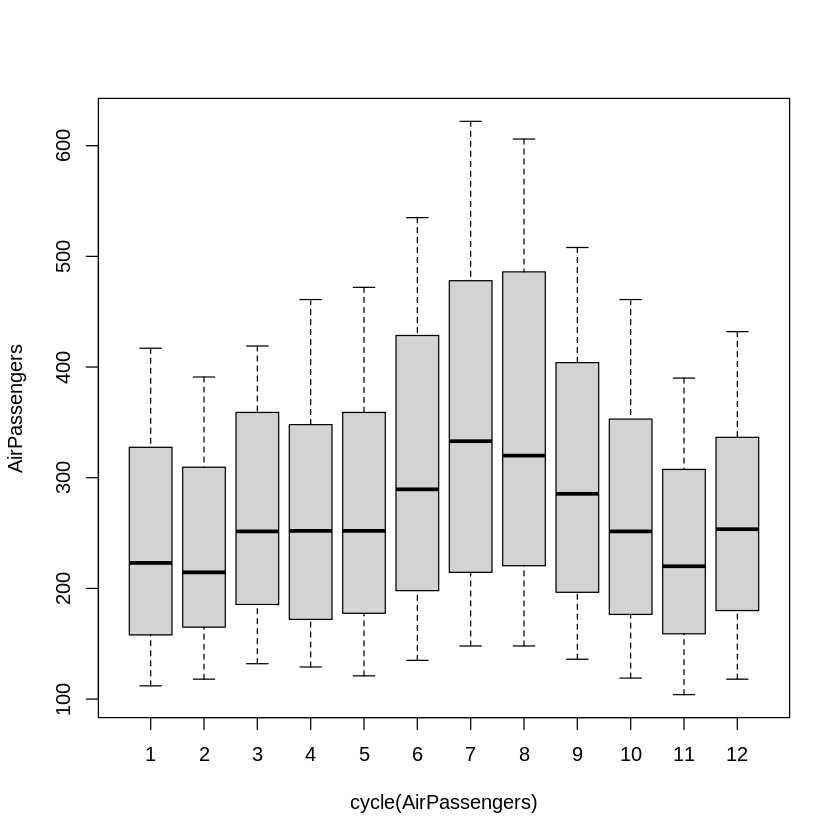

In [ ]:
boxplot(AirPassengers~cycle(AirPassengers))

In [ ]:
tsdata<-ts(AirPassengers, frequency=12)

In [ ]:
 ddata<-decompose(tsdata, "multiplicative")

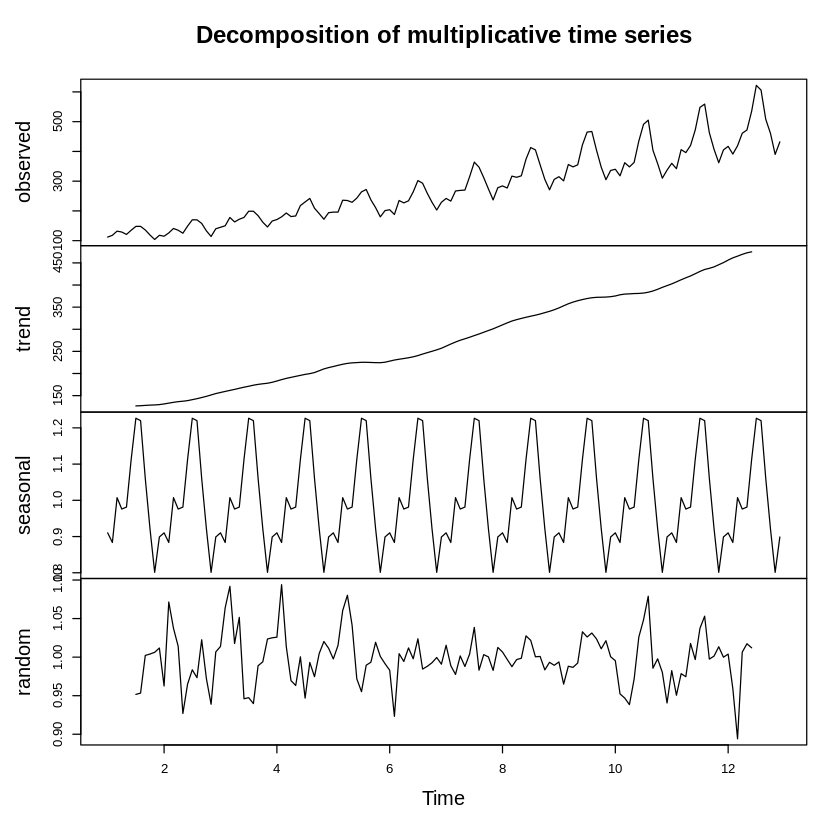

In [ ]:
 plot(ddata)

In [ ]:
mymodel<-auto.arima(AirPassengers)

In [ ]:
mymodel

Series: AirPassengers 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 = 132.3:  log likelihood = -504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

In [ ]:
auto.arima(AirPassengers, ic="aic", trace=TRUE)


 ARIMA(2,1,2)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(0,1,0)[12]                    : 1031.508
 ARIMA(1,1,0)(1,1,0)[12]                    : 1020.393
 ARIMA(0,1,1)(0,1,1)[12]                    : 1021.003
 ARIMA(1,1,0)(0,1,0)[12]                    : 1020.394
 ARIMA(1,1,0)(2,1,0)[12]                    : 1019.24
 ARIMA(1,1,0)(2,1,1)[12]                    : Inf
 ARIMA(1,1,0)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(2,1,0)[12]                    : 1032.12
 ARIMA(2,1,0)(2,1,0)[12]                    : 1021.12
 ARIMA(1,1,1)(2,1,0)[12]                    : 1021.033
 ARIMA(0,1,1)(2,1,0)[12]                    : 1019.178
 ARIMA(0,1,1)(1,1,0)[12]                    : 1020.425
 ARIMA(0,1,1)(2,1,1)[12]                    : Inf
 ARIMA(0,1,1)(1,1,1)[12]                    : Inf
 ARIMA(0,1,2)(2,1,0)[12]                    : 1021.148
 ARIMA(1,1,2)(2,1,0)[12]                    : 1022.805

 Best model: ARIMA(0,1,1)(2,1,0)[12]                    



Series: AirPassengers 
ARIMA(0,1,1)(2,1,0)[12] 

Coefficients:
          ma1     sar1    sar2
      -0.3634  -0.1239  0.1911
s.e.   0.0899   0.0934  0.1036

sigma^2 = 133.5:  log likelihood = -505.59
AIC=1019.18   AICc=1019.5   BIC=1030.68

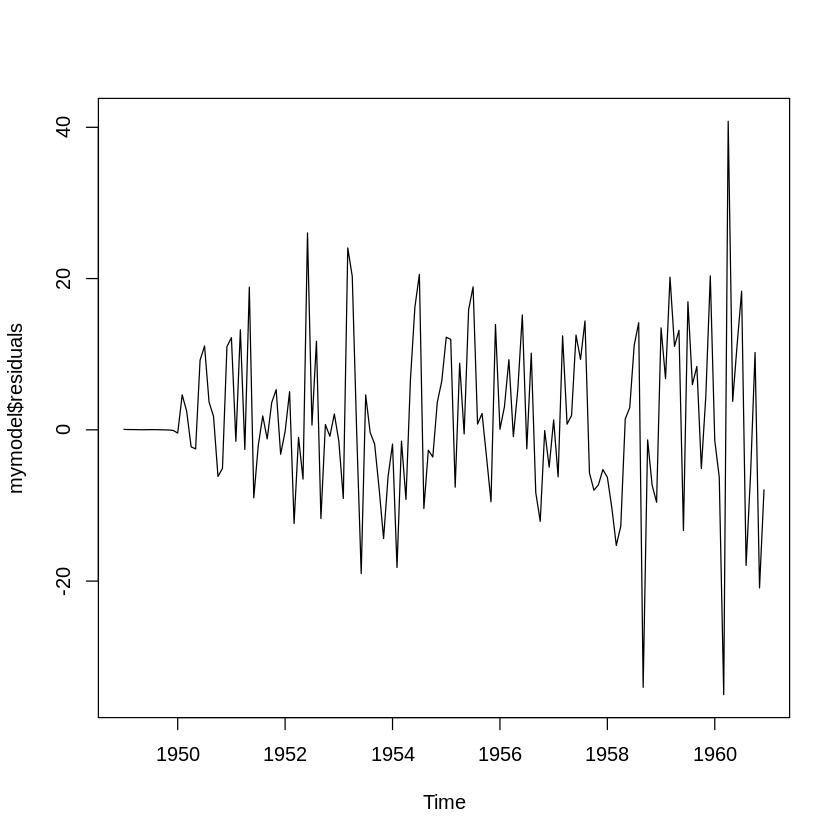

In [ ]:
plot.ts(mymodel$residuals)

In [ ]:
Box.test(mymodel$resid, lag=5, type="Ljung-Box")


	Box-Ljung test

data:  mymodel$resid
X-squared = 2.9244, df = 5, p-value = 0.7116


In [ ]:
library(tseries)

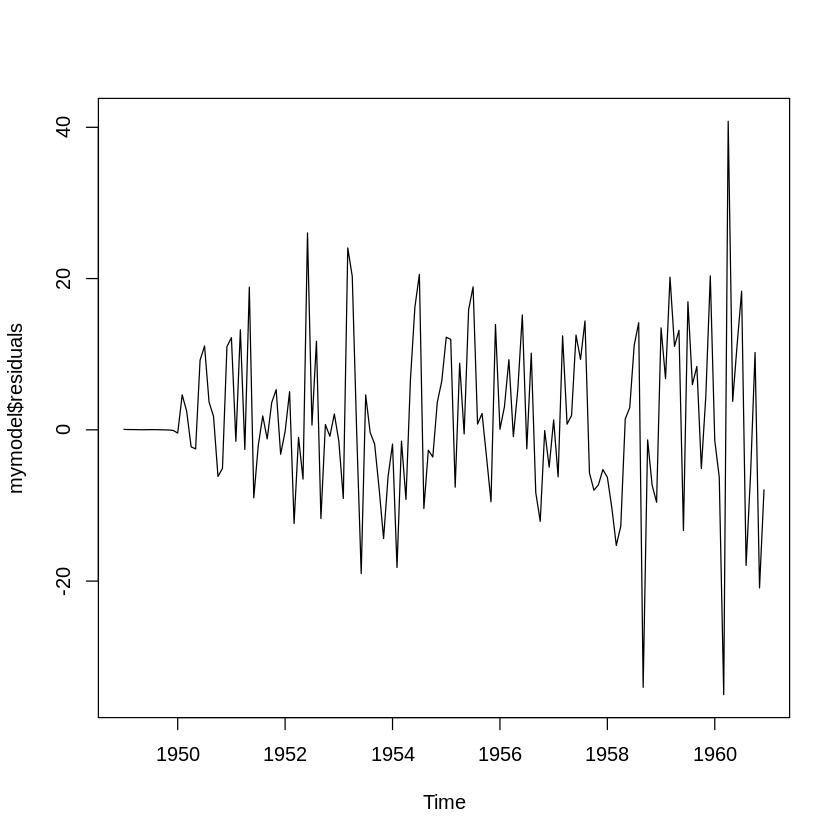

In [ ]:
plot.ts(mymodel$residuals)

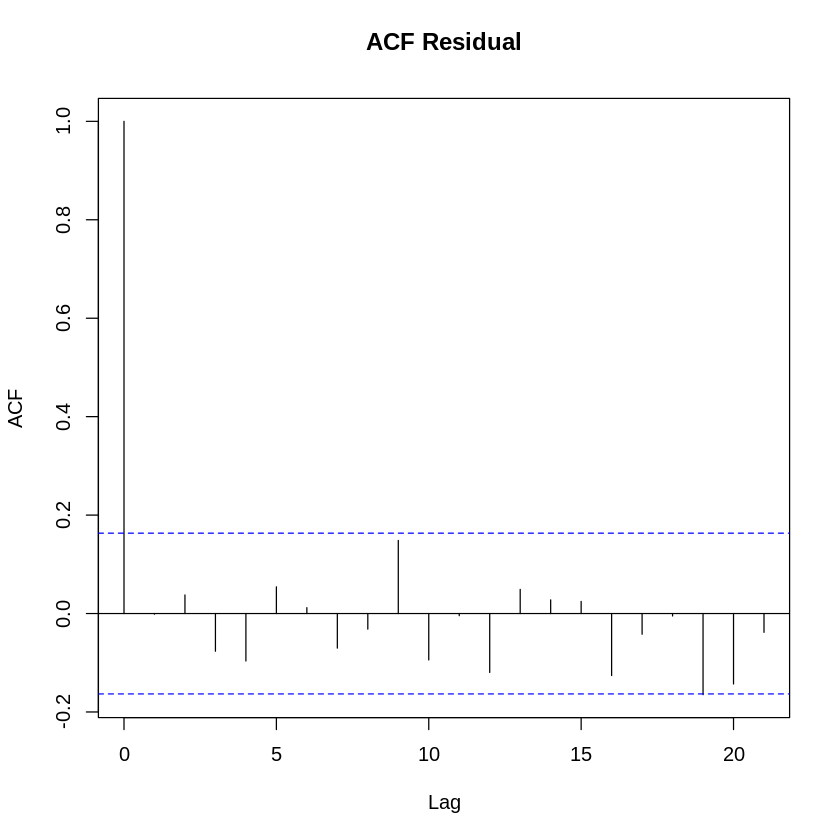

In [ ]:
acf(ts(mymodel$residuals), main='ACF Residual')

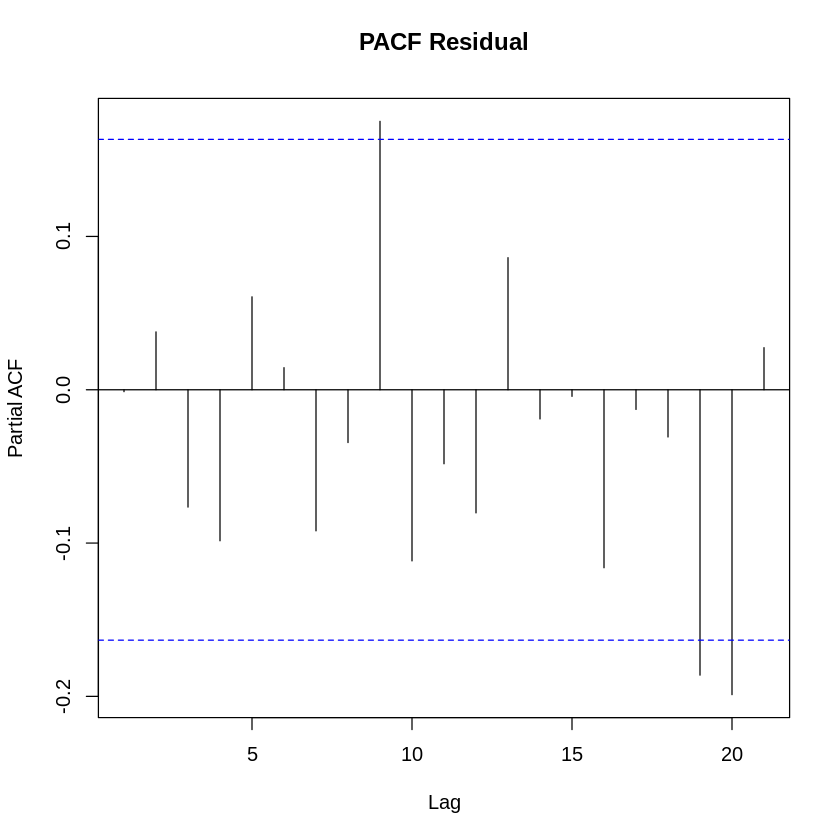

In [ ]:
pacf(ts(mymodel$residuals), main='PACF Residual')

In [ ]:
myforecast<-forecast(mymodel, level=c(95), h=10*12)

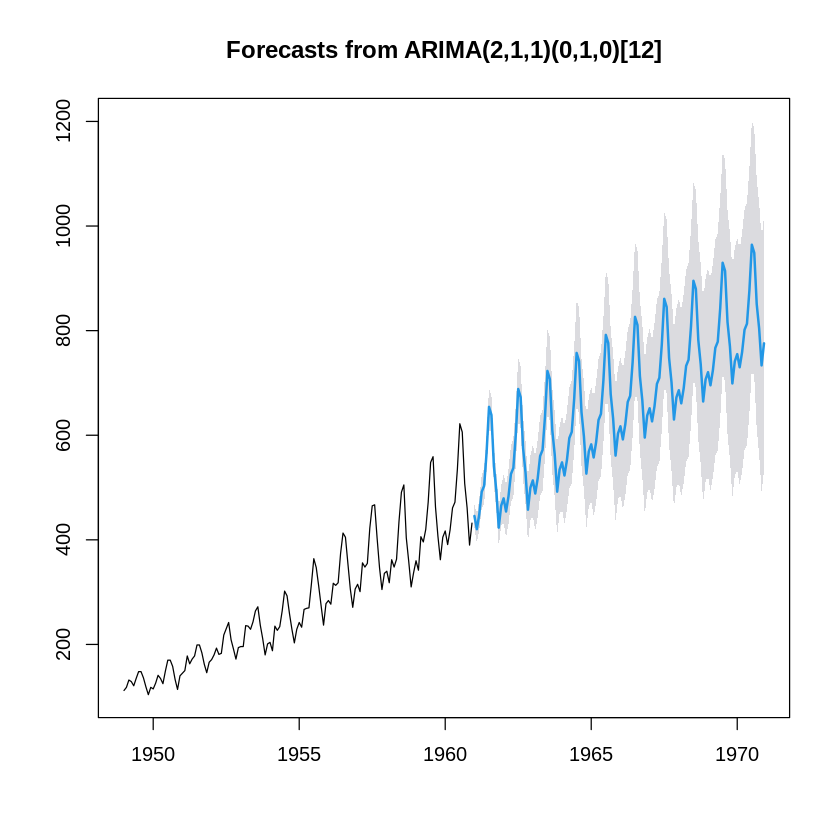

In [ ]:
 plot(myforecast)